In [66]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers





In [67]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,na_values='?', comment='\t',sep=' ', skipinitialspace=True)



In [68]:
dataset = raw_dataset.copy()

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [69]:
dataset = dataset.dropna()

dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [70]:

#check for unique values in the origin column
dataset['Origin'].unique()

array([1, 3, 2])

In [71]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [72]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [73]:
dataset = pd.get_dummies(dataset,dtype=int, columns=['Origin'])
dataset.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,0,0,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,0,0,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,0,0,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,0,0,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,0,0,1


In [74]:


train_dataset = dataset.sample(frac=0.8, random_state=0) #randomly sample 80% of the rows from dataset
test_dataset = dataset.drop(train_dataset.index) #remove the rows that are already present in the training data set




/home/ashertopaz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ashertopaz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ashertopaz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ashertopaz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

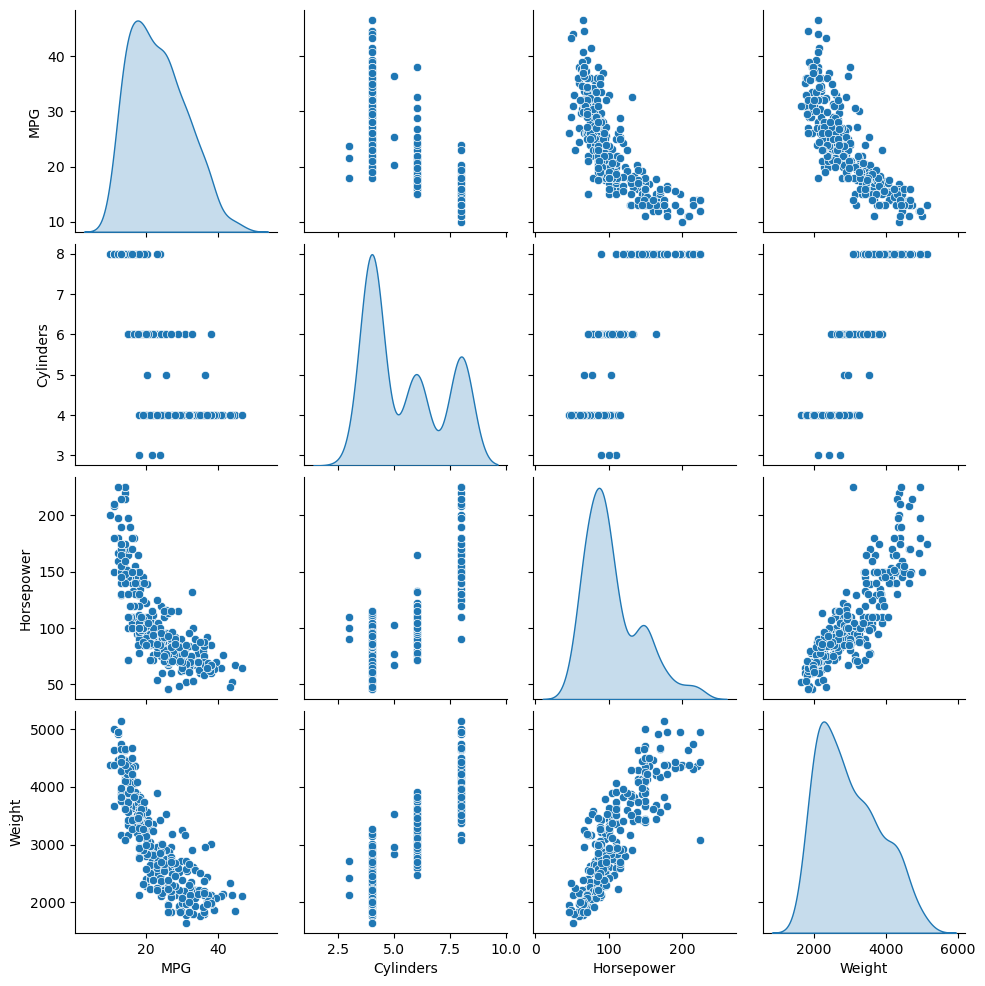

In [75]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Horsepower', 'Weight']], diag_kind='kde')

In [76]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin_Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Origin_Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
Origin_USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [77]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')



In [78]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Origin_Europe,0.178344,0.383413
Origin_Japan,0.197452,0.398712
Origin_USA,0.624204,0.485101


Creation of normalization layer

In [79]:
#normalization layer creation
#create a normalization layer using tensorflow keras api
#this normalization layer standardizes the distribution of input

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
  1.55592356e+01 7.58980942e+01 1.78343967e-01 1.97452217e-01
  6.24203861e-01]]


In [80]:
first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


The purpose of a normalization layer, such as Batch Normalization or Layer Normalization, is to improve the training speed, stability, and generalization performance of neural networks.
During training, normalization layers standardize the inputs to each layer by normalizing them to have zero mean and unit variance. This prevents the activations from becoming too large or too small, which can slow down training due to issues like vanishing or exploding gradients.
Normalization layers also reduce the dependence of gradients on the scale of the parameters or the initial values, making optimization more stable and facilitating faster convergence.
Additionally, normalization layers act as a form of regularization, reducing overfitting by adding noise to the activations and thereby improving the network's ability to generalize to unseen data.

The sequential model is a type of neural network architecture commonly used for building feedforward networks where each layer feeds its output as the input to the next layer in a sequential manner.
Its purpose is to provide a straightforward and intuitive way to create neural networks by simply stacking layers sequentially.
Sequential models are particularly useful for designing simple or standard architectures where the flow of information is strictly from input to output, without any complex branching or skip connections.
This simplicity makes sequential models well-suited for many common tasks, such as image classification, regression, or sequence-to-sequence learning, where a linear stack of layers is sufficient to capture the desired relationship between inputs and outputs.
In summary, while normalization layers aim to improve the training dynamics and generalization performance of neural networks by normalizing activations, sequential models offer a convenient framework for building simple yet effective feedforward architectures by stacking layers in a linear fashion.





In [81]:
#normalizes the 'Horsepower' feature. 
#It creates a separate normalization layer (horsepower_normalizer) for this feature.
#Certain features may require individualized preprocessing, such as normalization, 
#due to their unique characteristics or importance in the dataset.
horsepower = np.array(train_features['Horsepower']) #
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

#create sequential model made up of normalization layer followed by dense fully connected
#output layer wih one unit
horsepower_model = tf.keras.Sequential([horsepower_normalizer,layers.Dense(units=1)])
horsepower_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [82]:
# configures the neural network model for training by specifying the optimizer (Adam) and 
#loss function (mean absolute error). After compilation, the model is ready to be trained on the training data.
horsepower_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                         loss='mean_absolute_error')




In [83]:
#horsepower_model neural network model on the 'Horsepower' feature of the training data (train_features) 
#for 100 epochs, using the provided target labels (train_labels). It measures the execution time of the 
#training process and stores the training history in the history variable for later analysis.


%time
history = horsepower_model.fit(train_features['Horsepower'],
                               train_labels,
                               epochs=100,
                               verbose=0,
                               validation_split = 0.2)

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 12.9 µs


In [84]:

#the history object typically contains information about various metrics such as 
#loss and accuracy recorded during the training process
hist = pd.DataFrame(history.history)#history.history, you extract this information and convert it into a Pandas DataFrame.
hist['epoch'] = history.epoch #adding a new colum hipoch
hist.tail()


,loss,val_loss,epoch
95,3.805479,4.191717,95
96,3.806908,4.190766,96
97,3.805784,4.172359,97
98,3.804841,4.191242,98
99,3.805045,4.183276,99


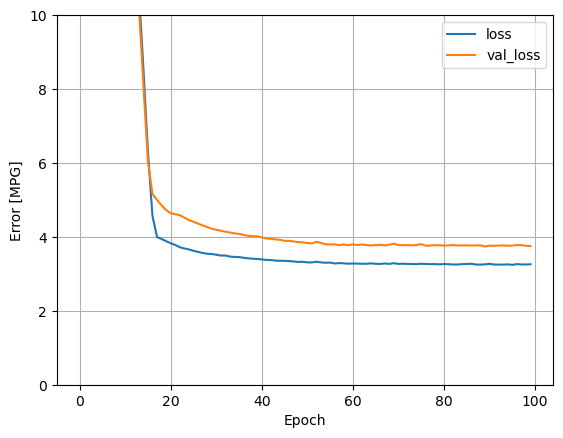

In [105]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss') # access the loss key from the history.history dictionary
    plt.plot(history.history['val_loss'], label='val_loss') #plots validation loss
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [106]:
#This method typically takes the test features and labels as inputs and 
#returns evaluation metrics such as loss and accuracy.

test_results = {}  #empty dictionary
test_results['horsepower_model'] = horsepower_model.evaluate(#use the evaluate method
    test_features['Horsepower'],   
    test_labels, verbose=0)   

x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 3ms/step


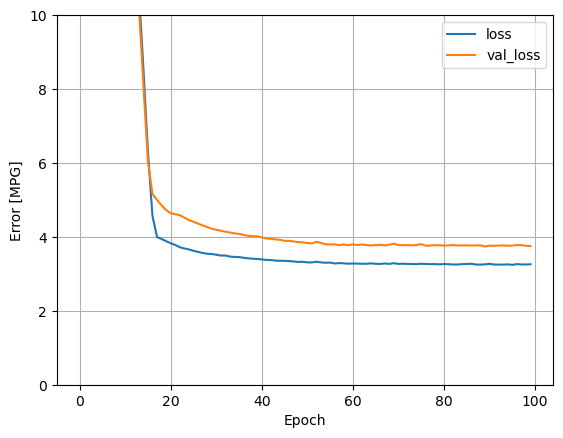

In [107]:
def plot_horsepower(x, y):
    plt.scatter(train_features['Horsepower'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

plot_loss(history)


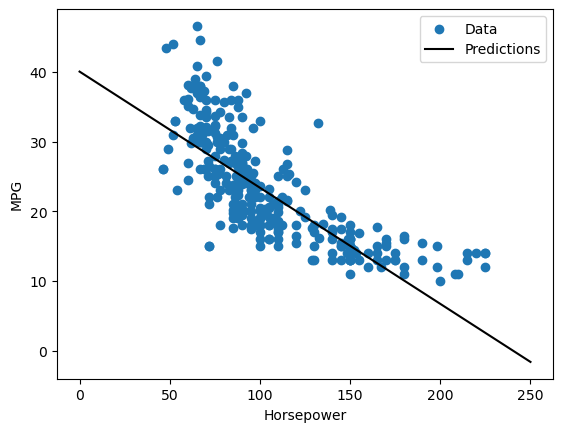

In [108]:
plot_horsepower(x, y)

In [109]:
#MLR- Multi Linear regression
#create a sequential model of layers where each layer has one input sensor and output sensor
#create a linear regression model
#creates a MLR model consisting of a normalization layer followed by a single Dense layer with one output neuron. 
#The normalization layer preprocesses the input features, and the Dense layer performs the linear regression by combining 
#the features to predict the output.

linear_model = tf.keras.Sequential([  
    #units=1 specifies that there is only one output neuron in this Dense layer, 
    #which is typical for a linear regression model
    normalizer,
    layers.Dense(units=1)  
    ])

In [110]:
#the weights matrix of the Dense layer in the linear_model. 
#These weights are learned during the training process and are used to make predictions 
#by performing matrix multiplication with the input features.
linear_model.layers[1].kernel

<tf.Variable 'dense_15/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.19897938],
       [ 0.3903376 ],
       [-0.5542159 ],
       [-0.4645679 ],
       [ 0.2075488 ],
       [-0.6526943 ],
       [-0.5540949 ],
       [ 0.15952486],
       [-0.22240782]], dtype=float32)>

In [111]:
#compiles the MLR model (linear_model) with a specific optimizer and loss function.


#this function call compiles the MLR model, which prepares it for training. 
#During compilation, you specify the optimizer and the loss function that the model will use.
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [112]:
%time

#training the modl
history = linear_model.fit(
    train_features,
    train_labels,epochs=100,verbose=0,validation_split = 0.2)

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 97 µs


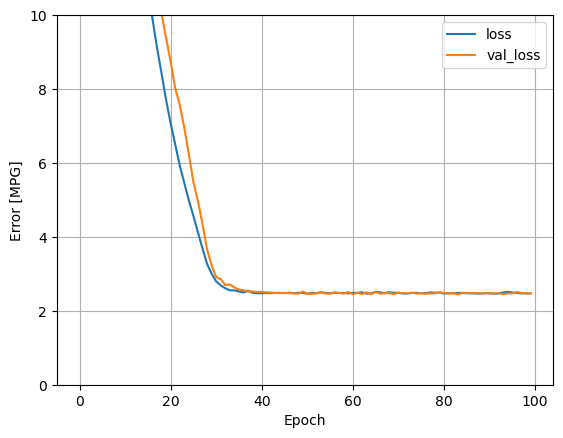

In [113]:
plot_loss(history)

In [114]:
#evaluates the MLR model (linear_model) on the test dataset and stores the evaluation results, 
#including the loss, in the test_results dictionary under the key 'linear_model'. 
#This allows for easy retrieval and comparison of model performance later on.


test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)



In [115]:
#DNN with one feature
def build_and_compile_model(norm):
    model = keras.Sequential([
        #normalization layer with #64 neurons relu activation function
        norm,layers.Dense(64, activation='relu'), 
        layers.Dense(64, activation='relu'), #another dense layer with 64 neurons and relu actuvation
        layers.Dense(1) #output layer with one neuron
        ])
    # During compilation, you specify the loss function and the optimizer to be used during training.
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model


In [116]:



dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

dnn_horsepower_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_16 (Dense)            (None, 64)                128       
                                                                 


 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [117]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 35.5 s, sys: 32 s, total: 1min 7s
Wall time: 21.4 s


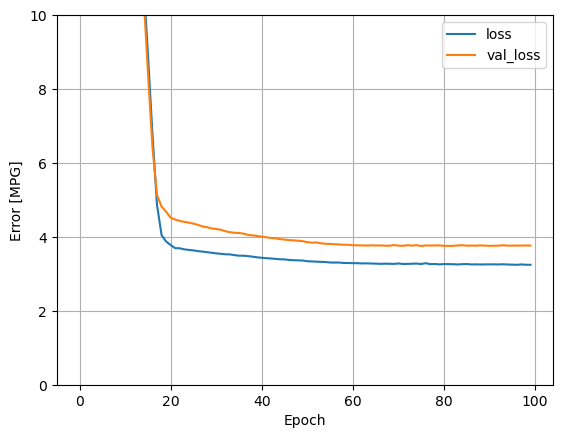

In [118]:
plot_loss(history)

In [119]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 12ms/step


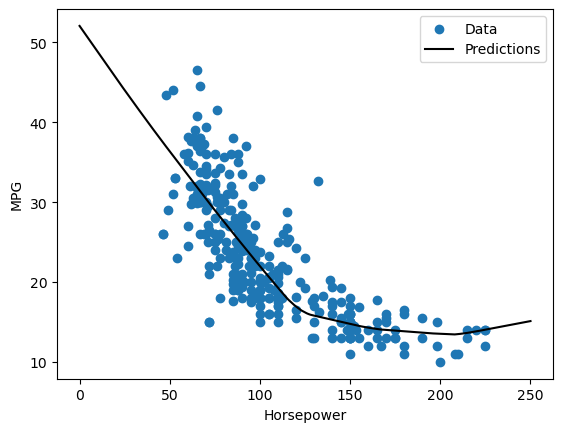

In [120]:
plot_horsepower(x, y)

In [121]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

In [122]:
#DNN with all features
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_19 (Dense)            (None, 64)                640       
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [123]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.651155
linear_model,2.481639
dnn_horsepower_model,2.895014
dnn_model,23.910860


3/3 [==============================] - 0s 15ms/step


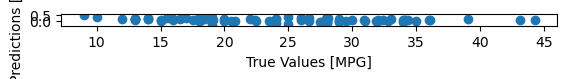

In [124]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')

plt.scatter(test_labels, test_predictions)

plt.xlabel('True Values [MPG]')

plt.ylabel('Predictions [MPG]')

lims = [0, 50]



(0.0, 50.0)

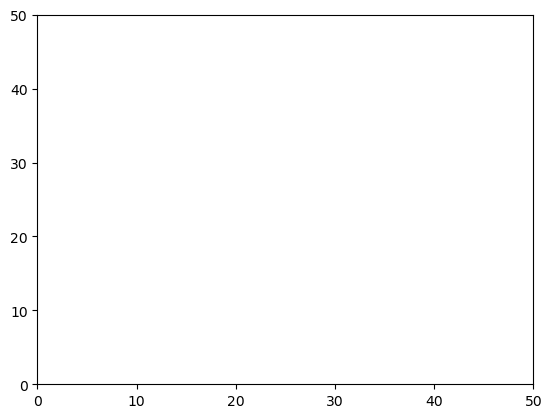

In [125]:
plt.xlim(lims)
plt.ylim(lims)